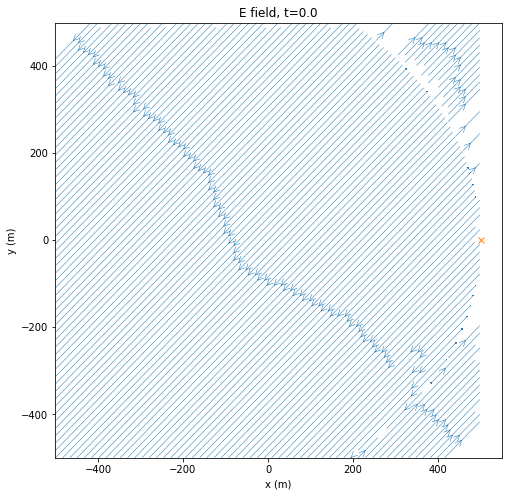

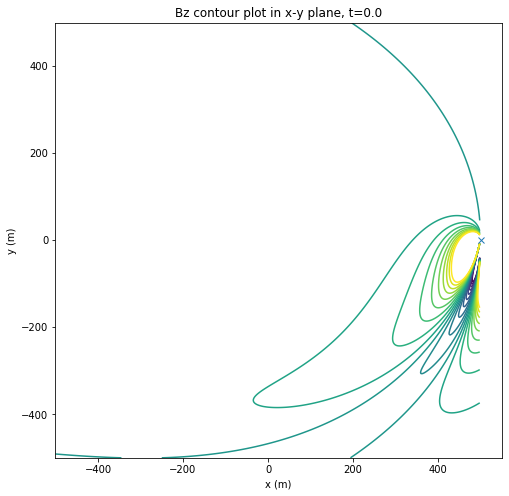

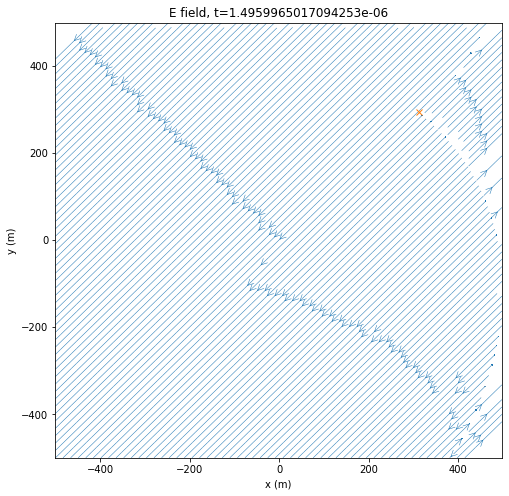

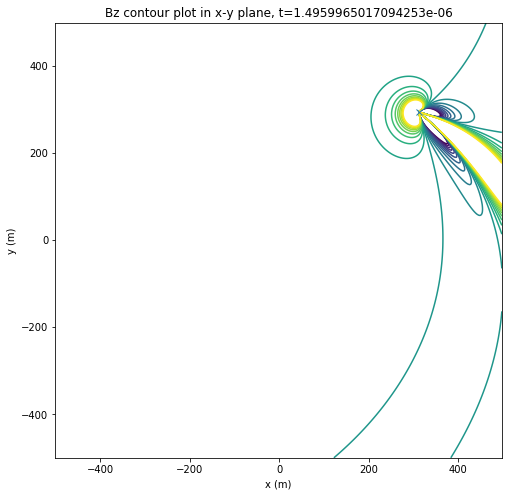

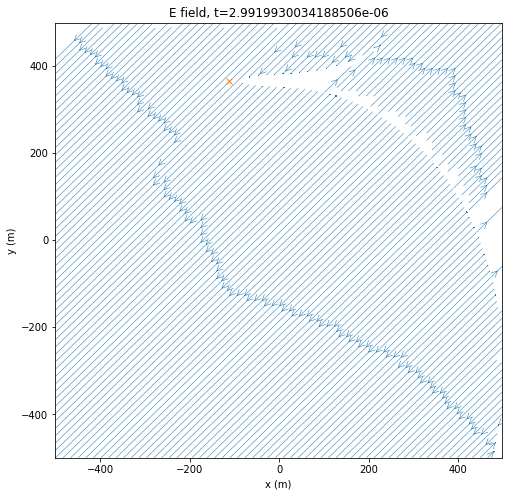

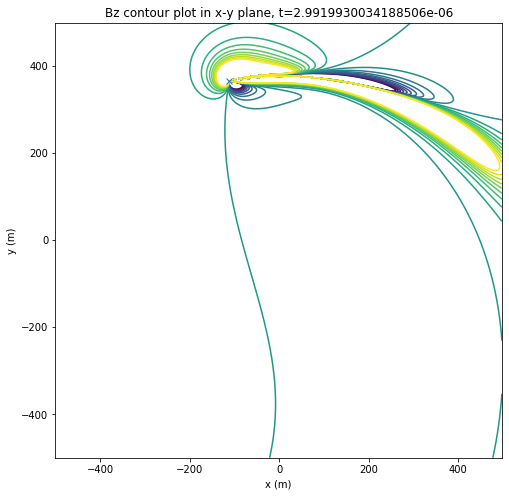

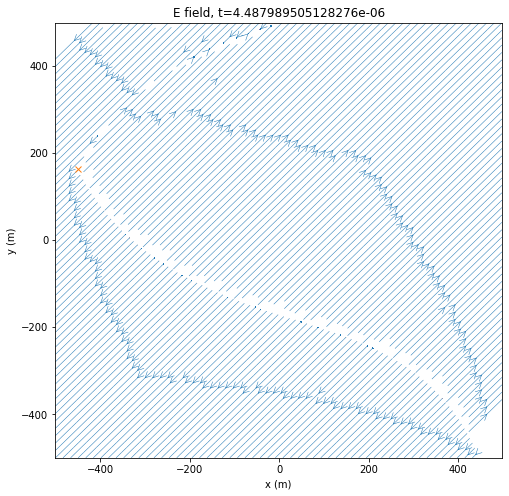

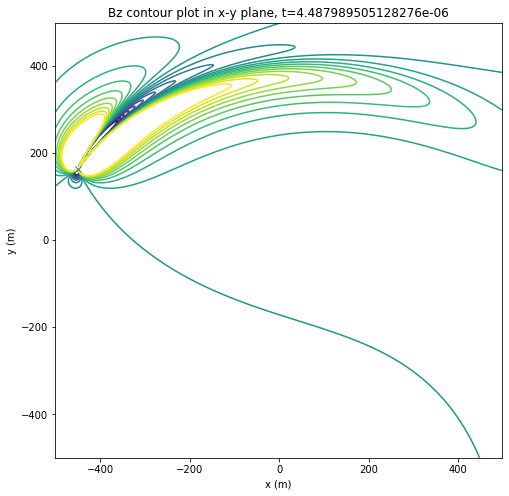

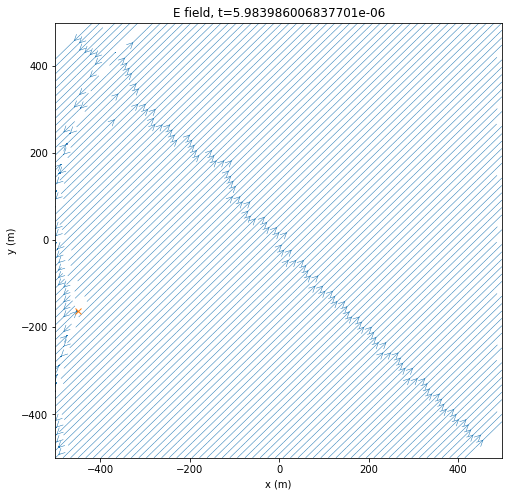

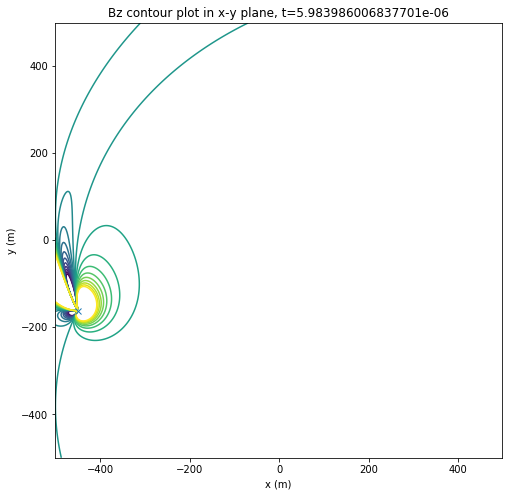

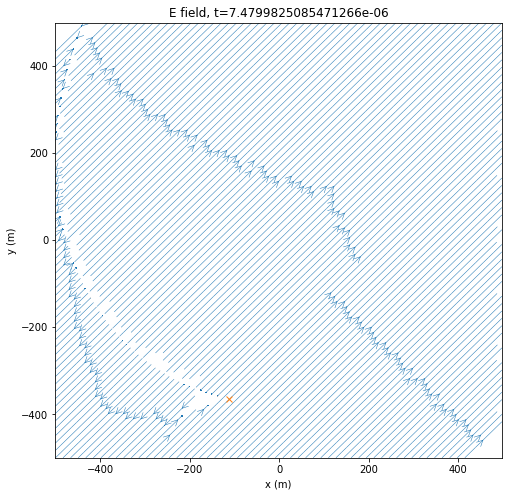

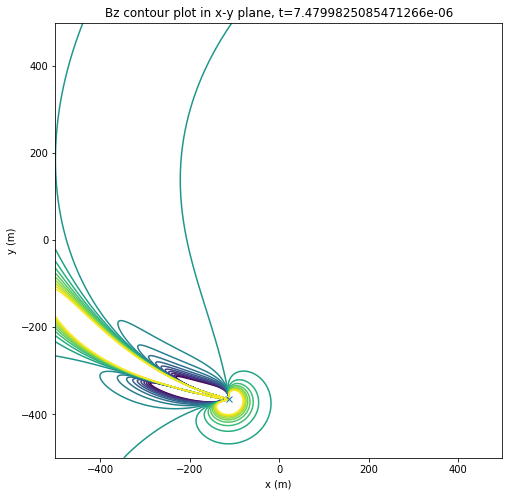

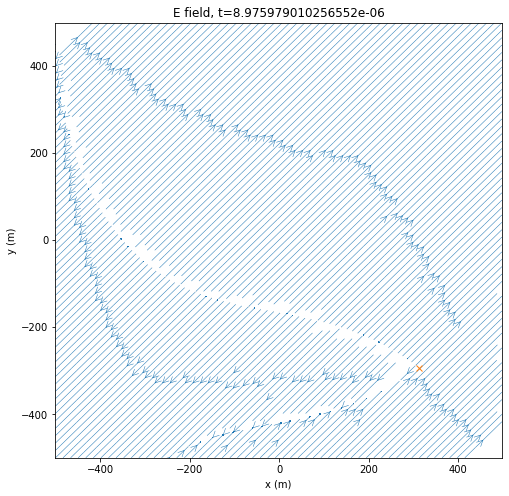

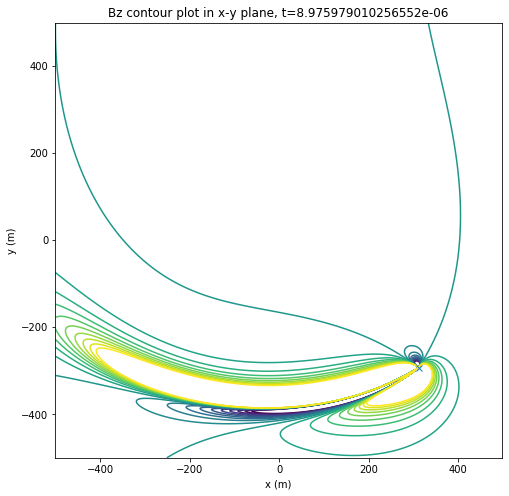

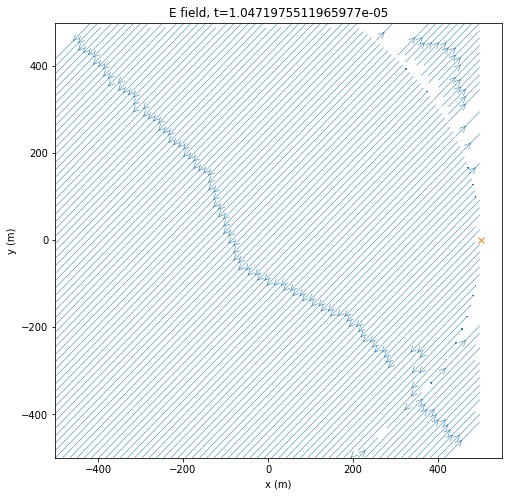

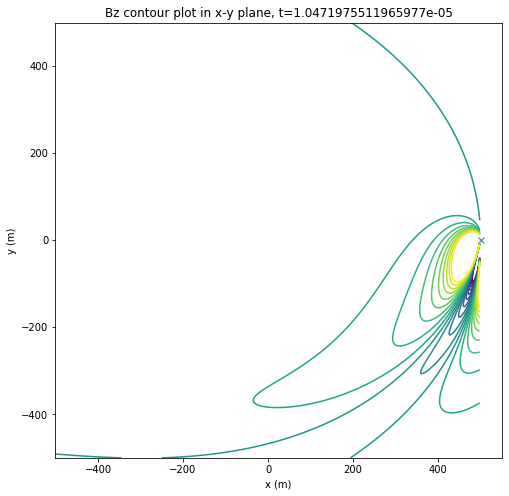

In [35]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

epsilon0=8.85*10**-12
u= 4*np.pi*10**-7
c=3e8
q=1
#lets have R=500 and do 500 x and y values (arbitrarily set p to 1 and let w be determined)
p=1
w=600000
R=p*c/w

def W(t):
    return [R*np.cos(w*t),0.75*R*np.sin(w*t)]

#Basically need to plot the electric and magnetic fields for a particle
#on this path, only instead of real time need to apply retarted time
#to calculate the E and B fields, t_r=t-r/c where r is the distance 
#between the "observer" and the particle

x= np.arange(-500,500,2)
y=np.arange(-500,500,2)
xx,yy=np.meshgrid(x,y)

def Ex(t):
    tr=t-np.sqrt((xx-W(t)[0])**2+(yy-W(t)[1])**2)/c
    return 1/(4*np.pi*epsilon0)*q*(xx-W(tr)[0])/(np.sqrt((xx-W(tr)[0])**2+(yy-W(tr)[1])**2))**3
def Ey(t):
    tr=t-np.sqrt((xx-W(t)[0])**2+(yy-W(t)[1])**2)/c
    return 1/(4*np.pi*epsilon0)*q*(xx-W(tr)[0])/(np.sqrt((xx-W(tr)[0])**2+(yy-W(tr)[1])**2))**3

def Bz(t):
    tr=t-np.sqrt((xx-W(t)[0])**2+(yy-W(t)[1])**2)/c
    return (1/c*(xx-W(tr)[0])/(np.sqrt((xx-W(tr)[0])**2+(yy-W(tr)[1])**2))*Ey(t)-1/c*(yy-W(tr)[1])/(np.sqrt((xx-W(tr)[0])**2+(yy-W(tr)[1])**2))*Ex(t))
g=0                                                                                             
        
                                                                                                
for i in np.linspace(0,2*np.pi/w,8):
    figure(1+2*g,figsize=(8,8))
    plt.streamplot(x,y,Ex(i),Ey(i),linewidth=0.5, cmap=plt.cm.inferno, density=2, arrowstyle='->', arrowsize=1.5)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('E field, t='+str(i))
    plt.plot(W(i)[0],W(i)[1],marker='x') #location of particle
    
    figure(2+2*g,figsize=(8,8))
    plt.contour(xx,yy,Bz(i)*10000,levels=range(-100,100,10))
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Bz contour plot in x-y plane, t='+str(i))
    plt.plot(W(i)[0],W(i)[1],marker='x') #location of particle
    g=g+1
                                                                                                  
#Something is wrong in my calculations I believe but hopefully the idea is there